# WeRateDogs

## Gathering

In [6]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

In [7]:
# Leitura do CSV fornecido
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
# Usando requests para fazer download do arquivo (image_predictions.tsv) está hospedado nos servidores da Udacity
# e deve ser baixado programaticamente usando a seguinte URL
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [9]:
# Leitura do TSV como um DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# API keys
# "não inclua suas chaves de API do Twitter e tokens de acesso no envio de seu projeto"
consumer_key = 'qhSwqxpKslaBZofulQi598DrI'
consumer_secret = 'UTdmFpZb24IHcGc8CAaxArwq6LfyVMgUZz1gSuJuHyu7lj7hD0'
access_token = '793618519-K9kFIsgzD9vhp14kD5GxOLnGFEGl3jnjVZnwcMh5'
access_secret = 'ySEfCVU4qhRHZ8dTC7r1geQjFABInO0r79MWlK6TZxzLB'

In [6]:
# Variáveis de Autorização do Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# Consulta na API do Twitter (usando as ID de tweets no arquivo do Twitter de WeRateDogs)
# para o conjunto de dados completo de cada tweet usando a biblioteca Tweepy do Python
# e armazene esses dados em um arquivo chamado tweet_json.txt

tweets_erros = []

with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        
        except:
            tweets_erros.append(tweet_id)
            print ("Erro no tweet_id: " + str(tweet_id))
            

Erro no tweet_id: 888202515573088257
Erro no tweet_id: 873697596434513921
Erro no tweet_id: 869988702071779329
Erro no tweet_id: 866816280283807744
Erro no tweet_id: 861769973181624320
Erro no tweet_id: 845459076796616705
Erro no tweet_id: 842892208864923648
Erro no tweet_id: 837012587749474308
Erro no tweet_id: 827228250799742977
Erro no tweet_id: 802247111496568832


Rate limit reached. Sleeping for: 436


Erro no tweet_id: 788178268662984705
Erro no tweet_id: 775096608509886464


Rate limit reached. Sleeping for: 465


Erro no tweet_id: 686947101016735744


In [8]:
# Total de erros na consulta da API
len(tweets_erros)

13

In [9]:
# Adicionando cada tweet numa lista

tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [10]:
# Cria o tweet_df DataFrame conforme solicitado pelo projeto
# "Então, leia este .txt linha por linha em um dataframe do Pandas com 
# (no mínimo) ID de tweet, contagem de retweets e contagem de favoritos."

tweet_df = pd.DataFrame()

# Adiciona as variáveis ao tweet_df DataFrame

tweet_df['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assessing

### Arquivo: twitter_archive

In [11]:
# Visualizando as linhas iniciais do arquivo twitter_archive
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [12]:
# Visualizando as linhas finais do arquivo twitter_archive
twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [13]:
# Visualizando as informações do arquivo twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Visualizando as estatísticas do arquivo twitter_archive
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [15]:
# Contagem de elementos na variável "nome"
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Bailey         7
Daisy          7
Buddy          7
Toby           7
Jack           6
Oscar          6
Leo            6
Milo           6
Jax            6
Dave           6
Koda           6
Rusty          6
Bella          6
Scout          6
Stanley        6
Louis          5
            ... 
Jiminus        1
Stormy         1
Ozzie          1
my             1
Brandy         1
Barclay        1
Enchilada      1
Marq           1
Benny          1
Obie           1
Rover          1
Derby          1
Bronte         1
Puff           1
Margo          1
Mary           1
Spanky         1
Blipson        1
Link           1
Pumpkin        1
Alexander      1
Alejandro      1
Mark           1
Leonard        1
Traviss        1
Mookie         1
Zoe            1
Grey          

In [16]:
# Lista dos valores da variável "nome" por ordem alfabética
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [17]:
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Arquivo: image_predictions

In [10]:
# Visualizando as linhas iniciais do arquivo image_predictions
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [11]:
# Visualizando as linhas finais do arquivo image_predictions
image_predictions.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [20]:
# Visualizando as informações do arquivo image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Visualizando as estatísticas do arquivo image_predictions
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [22]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Arquivo: tweet_df

In [23]:
# Visualizando as linhas iniciais do arquivo tweet_df
tweet_df.head()

id  retweet_count  favorite_count
0  892420643555336193           8591           38823
1  892177421306343426           6314           33256
2  891815181378084864           4190           25046
3  891689557279858688           8707           42190
4  891327558926688256           9477           40348

In [24]:
# Visualizando as linhas finais do arquivo tweet_df
tweet_df.tail()

id  retweet_count  favorite_count
2338  666049248165822465             40             109
2339  666044226329800704            141             299
2340  666033412701032449             44             125
2341  666029285002620928             47             130
2342  666020888022790149            518            2560

In [25]:
# Visualizando as informações do arquivo tweet_df
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
id                2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [26]:
# Visualizando as estatísticas do arquivo tweet_df
tweet_df.describe()

id  retweet_count  favorite_count
count  2.343000e+03    2343.000000     2343.000000
mean   7.422980e+17    3026.315408     8070.112249
std    6.834945e+16    5035.935690    12148.885319
min    6.660209e+17       0.000000        0.000000
25%    6.783607e+17     606.000000     1401.500000
50%    7.189392e+17    1409.000000     3535.000000
75%    7.986999e+17    3524.500000     9980.000000
max    8.924206e+17   77380.000000   143464.000000

In [27]:
list(tweet_df)

['id', 'retweet_count', 'favorite_count']

### Quality

No arquivo twitter_archive: 

- É possível encontrar várias colunas com valores NaN:
    - in_reply_to_status, 
    - in_reply_to_user_id, 
    - retweeted_status_id, 
    - retweeted_status_user_id, 
    - retweeted_status_timestamp

- A coluna name possui vários valores estranhos, como 'None', 'a', 'the', 'this' etc.

- As colunas não estão com formatos corretos:
    - timestamp não está no formato datetime,
    - dog_class em categórico,
    - tweet_id, in_reply_to_status_id, in_reply_to_user_id em strings.

- Não poderá haver tweets sem imagem.

- Não poderá haver retweets.

- Remover colunas identificadas com retweets.

- Há cães com nome incorreto.

### Tidiness

No arquivo twitter_archive:

- Os estágios dos cães estão listados em 4 colunas ao invés de uma única coluna. Devendo apresentar os valores: doggo, floofer, pupper, puppo.

- Juntar os arquivos tweet_df (como dados da API) e image_predictions ao twitter_archive, formando um único arquivo para trabalho.

    


## Cleaning

In [28]:
# Criando cópias dos originais para o trabalho de limpeza
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

### Define

Juntar tweet_df e o image_predictions ao twitter_archive (nas versões de cópia)

### Code

In [29]:
# Juntando tweet_df_clean ao twitter_arquive_clean
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_df_clean, left_on='tweet_id', right_on='id', how='inner')

In [30]:
# Juntando o image_predictions_clean ao twitter_arquive_clean
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

In [31]:
# Deletando o campo 'id' visto que a identificação já é feita pelo campo 'tweet_id'
twitter_archive_clean = twitter_archive_clean.drop('id', axis=1)

### Test

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2067 

### Define

Criar uma única variável (dog_class) para a classificação do cão e eliminar as 4 (doggo, floofer, pupper, puppo)

### Code

In [33]:
# Criar a variável 'dog_class' e preencher com a classificação (puppo|pupper|floofer|doggo) extraída da variável 'text'
twitter_archive_clean['dog_class'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [34]:
# Deletar as variáveis (doggo, floofer, pupper, puppo)
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [35]:
twitter_archive_clean.dog_class.value_counts()

pupper     231
doggo       75
puppo       29
floofer      3
Name: dog_class, dtype: int64

In [36]:
twitter_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888078434458587136                    NaN                  NaN   
20    887705289381826560                    NaN                  NaN   
21    887517139158093824                    NaN                  NaN   
22    887473957103951883                    NaN                  NaN   
23    887343217045368832                    NaN                  NaN   
24    887101392804085760                    NaN                  NaN   
25    886983233522544640                    NaN                  NaN   
26    886736880519319552                    NaN                  NaN   
27    886680336477933568                    NaN                  NaN   
28    886366144734445568                    NaN                  NaN   
29    886258384151887873                    NaN                  NaN   
...                  ...                    ...                  ...   
2037  666411507551481857                    NaN                  NaN   
2038  666407126856765440                    NaN                  NaN   
2039  666396247373291520                    NaN                  NaN   
2040  666373753744588802                    NaN                  NaN   
2041  666362758909284353                    NaN                  NaN   
2042  666353288456101888                    NaN                  NaN   
2043  666345417576210432                    NaN                  NaN   
2044  666337882303524864                    NaN                  NaN   
2045  666293911632134144                    NaN                  NaN   
2046  666287406224695296                    NaN                  NaN   
2047  666273097616637952                    NaN                  NaN   
2048  666268910803644416                    NaN                  NaN   
2049  666104133288665088                    NaN                  NaN   
2050  666102155909144576                    NaN                  NaN   
2051  666099513787052032                    NaN                  NaN   
2052  666094000022159362                    NaN                  NaN   
2053  666082916733198337                    NaN                  NaN   
2054  666073100786774016                    NaN                  NaN   
2055  666071193221509120                    NaN                  NaN   
2056  666063827256086533                    NaN                  NaN   
2057  666058600524156928                    NaN                  NaN   
2058  666057090499244032                    NaN                  NaN   
2059  666055525042405380                    NaN                  NaN   
2060  666051853826850816                    NaN         

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 non

### Define

Converter as variáveis:
timestamp para o format o datetime, 
dog_class para categórico
tweet_id, in_reply_to_status_id, in_reply_to_user_id para o formato string.

### Code

In [38]:
# Convertendo as variáveis para os formatos corretos

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['dog_class'] = twitter_archive_clean['dog_class'].astype('category')

twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')

twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')

### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                         

### Define

Remover retweets

### Code

In [40]:
# Remove os retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         1992 non-null object
in_reply_to_user_id           1992 non-null object
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
retweet_count                 1992 non-null int64
favorite_count                1992 non-null int64
jpg_url                       1992 non-null object
img_num                       1992 non-null int64
p1                            

### Define

Remover tweets que não possuem imagem.

### Code

In [42]:
# Remover tweets sem imagem.
twitter_archive_clean = twitter_archive_clean.dropna(subset=['jpg_url'])


### Test

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         1992 non-null object
in_reply_to_user_id           1992 non-null object
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
retweet_count                 1992 non-null int64
favorite_count                1992 non-null int64
jpg_url                       1992 non-null object
img_num                       1992 non-null int64
p1                            

### Define

Remover colunas identificadas com retweets.

### Code

In [44]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  1992 non-null float64
p2_dog          

In [46]:
twitter_archive_clean.in_reply_to_user_id.value_counts()

nan             1969
4196983835.0      23
Name: in_reply_to_user_id, dtype: int64

In [47]:
twitter_archive_clean

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0     892420643555336193                   nan                 nan   
1     892177421306343426                   nan                 nan   
2     891815181378084864                   nan                 nan   
3     891689557279858688                   nan                 nan   
4     891327558926688256                   nan                 nan   
5     891087950875897856                   nan                 nan   
6     890971913173991426                   nan                 nan   
7     890729181411237888                   nan                 nan   
8     890609185150312448                   nan                 nan   
9     890240255349198849                   nan                 nan   
10    890006608113172480                   nan                 nan   
11    889880896479866881                   nan                 nan   
12    889665388333682689                   nan                 nan   
13    889638837579907072                   nan                 nan   
14    889531135344209921                   nan                 nan   
15    889278841981685760                   nan                 nan   
16    888917238123831296                   nan                 nan   
17    888804989199671297                   nan                 nan   
18    888554962724278272                   nan                 nan   
19    888078434458587136                   nan                 nan   
20    887705289381826560                   nan                 nan   
21    887517139158093824                   nan                 nan   
22    887473957103951883                   nan                 nan   
23    887343217045368832                   nan                 nan   
24    887101392804085760                   nan                 nan   
25    886983233522544640                   nan                 nan   
26    886736880519319552                   nan                 nan   
27    886680336477933568                   nan                 nan   
28    886366144734445568                   nan                 nan   
29    886258384151887873                   nan                 nan   
...                  ...                   ...                 ...   
2037  666411507551481857                   nan                 nan   
2038  666407126856765440                   nan                 nan   
2039  666396247373291520                   nan                 nan   
2040  666373753744588802                   nan                 nan   
2041  666362758909284353                   nan                 nan   
2042  666353288456101888                   nan                 nan   
2043  666345417576210432                   nan                 nan   
2044  666337882303524864                   nan                 nan   
2045  666293911632134144                   nan                 nan   
2046  666287406224695296                   nan                 nan   
2047  666273097616637952                   nan                 nan   
2048  666268910803644416                   nan                 nan   
2049  666104133288665088                   nan                 nan   
2050  666102155909144576                   nan                 nan   
2051  666099513787052032                   nan                 nan   
2052  666094000022159362                   nan                 nan   
2053  666082916733198337                   nan                 nan   
2054  666073100786774016                   nan                 nan   
2055  666071193221509120                   nan                 nan   
2056  666063827256086533                   nan                 nan   
2057  666058600524156928                   nan                 nan   
2058  666057090499244032                   nan                 nan   
2059  666055525042405380                   nan                 nan   
2060  666051853826850816                   nan                 nan   
2061  666050758794694657                   nan                 nan   
2062  666049248165822465  

## Analyzing

### Analisando o rating

Identificando os valores de rating

In [48]:
# Criando a coluna 'rating' a partir da divisão do rating_numerator e rating_denominator
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [49]:
twitter_archive_clean.rating.value_counts()

1.200000      454
1.000000      421
1.100000      401
1.300000      260
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
177.600000      1
2.600000        1
3.428571        1
0.636364        1
0.818182        1
42.000000       1
7.500000        1
2.700000        1
Name: rating, dtype: int64

In [50]:
twitter_archive_clean.rating.describe()

count    1992.000000
mean        1.169218
std         4.069112
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

Os valores obtidos com a variável rating demonstram que a maioria das notas estão classificadas como 1,0, 1,1 e 1,2.
A menor nota é zero.
A maior nota é 177,6. Torna-se um indicativo erro para nova análise em busca da confirmação.
O valor de 42,0 também indica a suspeito de estar errado, necessitando de confirmação futura. Assim, o rating carece de mais análises.

## Visualizing

In [51]:
import matplotlib.pyplot as plt

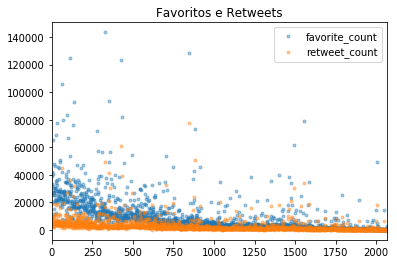

In [52]:
twitter_archive_clean[['favorite_count', 'retweet_count']].plot(style = '.', alpha = 0.4)
plt.title('Favoritos e Retweets')
plt.show()

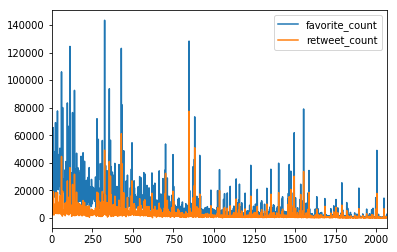

In [53]:
twitter_archive_clean[['favorite_count','retweet_count']].plot()
plt.show()

Nos dois gráficos acima é possível observar um comportamento de semelhança entre a quatidade de tweets favoritos e a quantidade de retweets. Já era de se esperar quanto maior a quantidade de retweets também seja observado um maior valor na quantidade de favoritos. A confirmação do coeficiente de correlação entre ambas variáveis é determinado a seguir:

In [54]:
# Correlação
twitter_archive_clean['favorite_count'].corr(twitter_archive_clean['retweet_count'])

0.91732608608945176

### Save

In [55]:
# Salvar o DataFrame em um arquivo csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')